In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics.cluster import adjusted_rand_score

In [124]:
# importing data set 
data = pd.read_csv("C:/Users/Lenovo/OneDrive/Desktop/data/data/mcdonalds.csv")
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [125]:
data.shape

(1453, 15)

In [126]:
data.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [127]:
data.shape

(1453, 15)

In [128]:
data.iloc[0:5,0:11]

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No


In [129]:
def yn_to_num(X):
    X = X.iloc[:,0:11]
    X = X.applymap(lambda x: 1 if x=='Yes' else 0)
    return X

In [130]:
MD_x = yn_to_num(data)

In [131]:
MD_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   yummy       1453 non-null   int64
 1   convenient  1453 non-null   int64
 2   spicy       1453 non-null   int64
 3   fattening   1453 non-null   int64
 4   greasy      1453 non-null   int64
 5   fast        1453 non-null   int64
 6   cheap       1453 non-null   int64
 7   tasty       1453 non-null   int64
 8   expensive   1453 non-null   int64
 9   healthy     1453 non-null   int64
 10  disgusting  1453 non-null   int64
dtypes: int64(11)
memory usage: 125.0 KB


In [132]:
np.round(np.mean(MD_x, axis=0), 2)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

In [133]:
def scale(X):
    sc = StandardScaler()
    X_scale = sc.fit_transform(X)
    return X_scale

In [134]:
MD_scale = scale(MD_x)

In [135]:
MD_pca = PCA().fit(MD_scale)
print(np.round(MD_pca.components_, 1))

[[-0.4 -0.3 -0.   0.2  0.3 -0.2 -0.3 -0.4  0.3 -0.3  0.4]
 [ 0.3 -0.   0.1 -0.2 -0.1 -0.3 -0.6  0.2  0.6  0.2 -0.1]
 [-0.3 -0.3  0.  -0.6 -0.4 -0.2  0.1 -0.3 -0.2  0.4  0.1]
 [ 0.  -0.   0.8 -0.   0.3  0.1  0.1  0.1  0.   0.3  0.2]
 [ 0.3 -0.4 -0.2  0.1  0.3 -0.6  0.3  0.3 -0.2  0.1  0.1]
 [-0.1  0.2  0.4  0.1 -0.3 -0.6  0.  -0.1 -0.2 -0.4 -0.3]
 [ 0.2 -0.7  0.2 -0.  -0.3  0.4 -0.   0.2  0.  -0.4 -0. ]
 [ 0.   0.2 -0.  -0.7  0.5  0.1 -0.1  0.1 -0.1 -0.4 -0.1]
 [-0.2 -0.3  0.   0.1  0.3  0.1 -0.1 -0.2 -0.   0.2 -0.8]
 [ 0.7  0.   0.1 -0.  -0.   0.   0.1 -0.7  0.  -0.1 -0. ]
 [-0.1  0.  -0.  -0.1 -0.  -0.1  0.7  0.   0.7 -0.1 -0.1]]


In [136]:
MD_pca.explained_variance_

array([2.81316617, 1.6329477 , 1.38111047, 1.08171127, 0.91895162,
       0.78253978, 0.71533376, 0.59270042, 0.52426978, 0.3078135 ,
       0.25703129])

In [137]:
MD_boot_kmeans=[]
for i in range(2,9):
    MD_boot_kmeans.append(KMeans(n_clusters=i, n_init=10, random_state=1234).fit(MD_x))

C:\Users\Lenovo\OneDrive\Desktop\ml_projects\mc_donalds\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\Lenovo\OneDrive\Desktop\ml_projects\mc_donalds\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\Lenovo\OneDrive\Desktop\ml_projects\mc_donalds\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\Lenovo\OneDrive\Deskto

Text(0, 0.5, 'inertia')

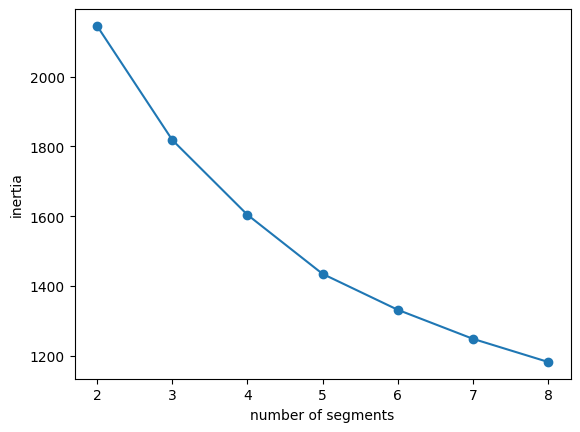

In [138]:
plt.plot(range(2, 9), [kmeans.inertia_ for kmeans in MD_boot_kmeans], marker="o")
plt.xlabel("number of segments")
plt.ylabel("inertia")

In [139]:
MD_kmeans.cluster_centers_.shape

(4, 11)

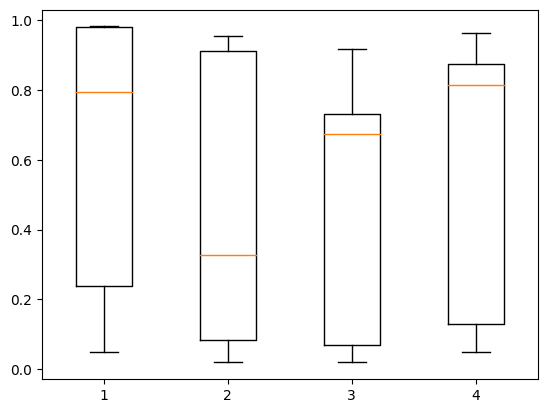

In [170]:
plt.boxplot(MD_kmeans.cluster_centers_.T);

In [141]:
MD_kmeans = KMeans(n_clusters=4, random_state=1234).fit(MD_x)

C:\Users\Lenovo\OneDrive\Desktop\ml_projects\mc_donalds\env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\OneDrive\Desktop\ml_projects\mc_donalds\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


C:\Users\Lenovo\OneDrive\Desktop\ml_projects\mc_donalds\env\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
C:\Users\Lenovo\OneDrive\Desktop\ml_projects\mc_donalds\env\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


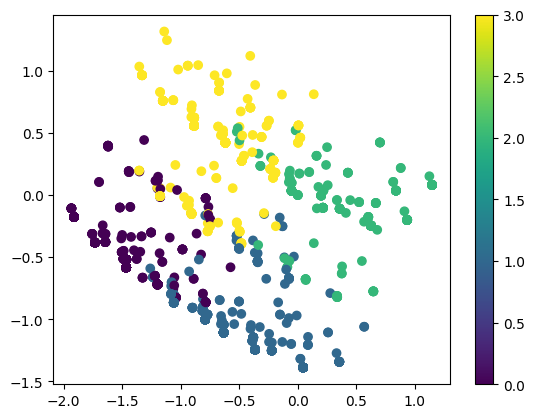

In [142]:
plt.scatter(MD_pca.transform(MD_x)[:, 0], MD_pca.transform(MD_x)[:, 1], c=MD_kmeans.labels_, cmap="viridis")
plt.colorbar()
plt.show()

C:\Users\Lenovo\OneDrive\Desktop\ml_projects\mc_donalds\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\Lenovo\OneDrive\Desktop\ml_projects\mc_donalds\env\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
C:\Users\Lenovo\OneDrive\Desktop\ml_projects\mc_donalds\env\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


GaussianMixture(n_components=4, random_state=1234)


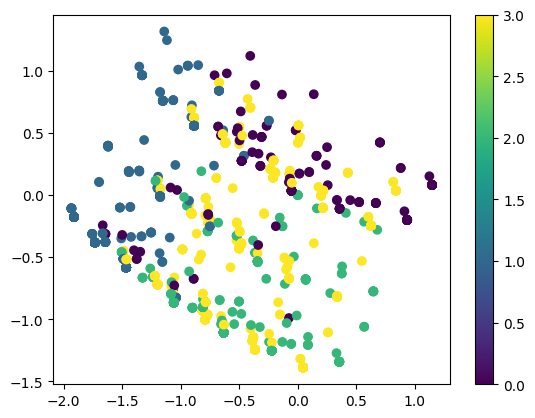

In [143]:
gmm = GaussianMixture(n_components=4, random_state=1234).fit(MD_x)
print(gmm)

plt.scatter(MD_pca.transform(MD_x)[:, 0], MD_pca.transform(MD_x)[:, 1], c=gmm.predict(MD_x), cmap="viridis")
plt.colorbar()
plt.show()

In [144]:
MD_k4 = MD_kmeans.labels_
MD_m4a = GaussianMixture(n_components=4, random_state=1234).fit(MD_x).predict(MD_x)
print(pd.crosstab(MD_k4, MD_m4a))

col_0    0    1    2    3
row_0                    
0       13  299   10  191
1        1    0  176  189
2      113    0   21  108
3       33  127    8  164


C:\Users\Lenovo\OneDrive\Desktop\ml_projects\mc_donalds\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


In [145]:
data.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [146]:
np.flip(np.unique(data['Like'], return_counts=True)[1])

array([143, 152, 169,  71,  73,  59,  58, 160, 229, 187, 152], dtype=int64)

In [147]:
test = data["Like"].to_numpy()

In [148]:
unique = np.unique(test, return_counts=True)

In [149]:
unique

(array(['+1', '+2', '+3', '+4', '-1', '-2', '-3', '-4', '0',
        'I hate it!-5', 'I love it!+5'], dtype=object),
 array([152, 187, 229, 160,  58,  59,  73,  71, 169, 152, 143], dtype=int64))

In [150]:
test[test=='I hate it!-5']='-5'
test[test=='I love it!+5']='+5'
        


In [151]:
data['Like'] = test

In [152]:
data['Like_n'] = pd.to_numeric(data['Like'])

In [153]:
data['Like_n']

0      -3
1       2
2       1
3       4
4       2
       ..
1448   -5
1449    2
1450    3
1451    4
1452   -3
Name: Like_n, Length: 1453, dtype: int64

In [154]:
data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,Like_n
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female,-3
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female,2
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female,1
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female,4
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,-5,47,Once a year,Male,-5
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female,2
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female,3
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male,4


In [155]:
X_2 = yn_to_num(data)

In [156]:
X_2['Like_n'] = data['Like_n']

In [157]:
X_2.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like_n
0,0,1,0,1,0,1,1,0,1,0,0,-3
1,1,1,0,1,1,1,1,1,1,0,0,2
2,0,1,1,1,1,1,0,1,1,1,0,1
3,1,1,0,1,1,1,1,1,0,0,1,4
4,0,1,0,1,1,1,1,0,0,1,0,2


In [158]:
X_2_scale = scale(X_2)

In [159]:
gmm = GaussianMixture(n_components=2, n_init=10, random_state=1234, verbose=0)
gmm.fit(X_2_scale)

C:\Users\Lenovo\OneDrive\Desktop\ml_projects\mc_donalds\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\Lenovo\OneDrive\Desktop\ml_projects\mc_donalds\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\Lenovo\OneDrive\Desktop\ml_projects\mc_donalds\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\Lenovo\OneDrive\Deskto

GaussianMixture(n_components=2, n_init=10, random_state=1234)

In [160]:
data['cluster'] = gmm.predict(X_2_scale)

In [161]:
data['cluster']

0       1
1       0
2       0
3       0
4       1
       ..
1448    1
1449    0
1450    0
1451    0
1452    1
Name: cluster, Length: 1453, dtype: int64

In [162]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,Like_n,cluster
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female,-3,1
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female,2,0
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female,1,0
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female,4,0
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male,2,1


In [163]:
like_n = data['Like_n'].values
clusters = data['cluster'].values

In [164]:
like_n

array([-3,  2,  1, ...,  3,  4, -3], dtype=int64)

In [165]:
# pip install statsmodels

In [166]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

df = pd.DataFrame({'Like_n': like_n, 'Cluster': clusters})
model = ols('Like_n ~ Cluster', data=df).fit()
anova_results = anova_lm(model)

print(anova_results)

              df       sum_sq      mean_sq           F         PR(>F)
Cluster      1.0  5652.385816  5652.385816  970.218421  1.556793e-163
Residual  1451.0  8453.366421     5.825890         NaN            NaN


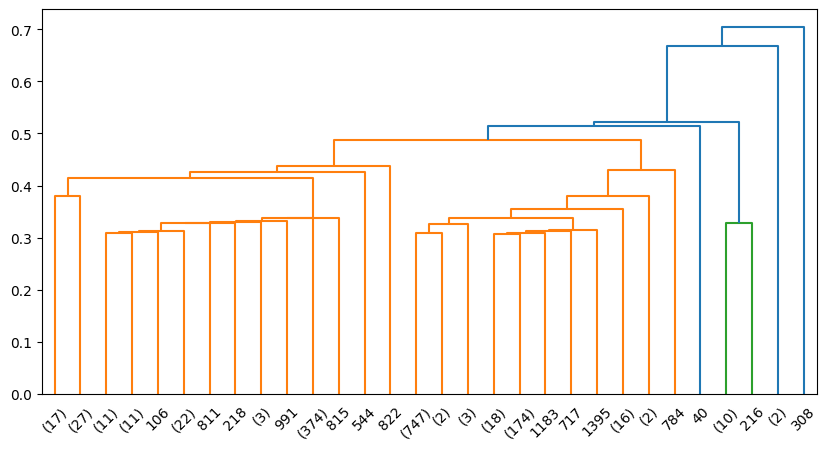

In [167]:
X_2_pca= PCA(n_components=2).fit_transform(X_2_scale)
X_2_dist = pdist(X_2_pca)
X_2_link = linkage(X_2_dist)
plt.figure(figsize=(10, 5))
dendrogram(X_2_link, orientation='top', distance_sort='descending',truncate_mode='lastp' ,show_leaf_counts=True)
plt.show()

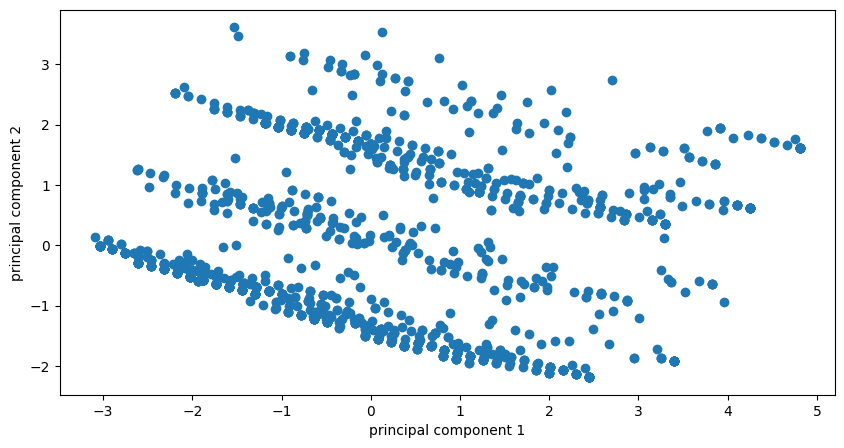

In [171]:
# MD_k4 = GaussianMixture(n_components=4, random_state=1234).fit(MD_x)
plt.figure(figsize=(10, 5))
plt.scatter(X_2_pca[:, 0], X_2_pca[:, 1])
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.show()